In [14]:
import os
import shutil

source_folder = '/home/ics/code_xwd/dataset/TIMIT_all[train+test]'
target_folder = '/home/ics/code_xwd/dataset/TIMIT_train'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

subfolders = os.listdir(source_folder)

for subfolder in subfolders:
    subfolder_path = os.path.join(source_folder, subfolder)
    if os.path.isdir(subfolder_path):
        files = os.listdir(subfolder_path)
        new_subfolder_path = os.path.join(target_folder, subfolder)
        if not os.path.exists(new_subfolder_path):
            os.makedirs(new_subfolder_path)
        for i, file in enumerate(files):
            if i in [1,3,4,6,7,8,9]:  # 选择要提取的音频文件的索引，这里选择第1个、第3个、第6个
                file_path = os.path.join(subfolder_path, file)
                new_file_path = os.path.join(new_subfolder_path, file)
                shutil.copyfile(file_path, new_file_path)
                shutil.copyfile(file_path, new_file_path)

In [ ]:
import os
import shutil

folder_A = '/home/ics/code_xwd/dataset/TIMIT_test'
folder_B = '/home/ics/code_xwd/dataset/TIMIT_train'
folder_A_1 = '/home/ics/code_xwd/dataset/TIMIT_test_1'
folder_B_1 = '/home/ics/code_xwd/dataset/TIMIT_train_1'

# 获取文件夹A中的子文件夹名称列表
subfolders_A = [name for name in os.listdir(folder_A) if os.path.isdir(os.path.join(folder_A, name))]

# 获取文件夹B中的子文件夹名称列表
subfolders_B = [name for name in os.listdir(folder_B) if os.path.isdir(os.path.join(folder_B, name))]

# 查找A和B中具有相同名称的文件夹
common_subfolders = set(subfolders_A) & set(subfolders_B)

# 创建A_1和B_1文件夹（如果不存在）
os.makedirs(folder_A_1, exist_ok=True)
os.makedirs(folder_B_1, exist_ok=True)

# 将A中具有相同名称的文件夹复制到A_1中
for subfolder in common_subfolders:
    source_path = os.path.join(folder_A, subfolder)
    target_path = os.path.join(folder_A_1, subfolder)
    shutil.copytree(source_path, target_path)

# 将B中具有相同名称的文件夹复制到B_1中
for subfolder in common_subfolders:
    source_path = os.path.join(folder_B, subfolder)
    target_path = os.path.join(folder_B_1, subfolder)
    shutil.copytree(source_path, target_path)

In [11]:
import numpy as np

id_label = np.loadtxt("/home/ics/code_xwd/speaker_backdoor/label-encoder-audionet-TIMIT_test.txt", dtype=str, converters={0: lambda s: s[1:-1]})
#print(id_label)

id2label = {}
label2id = {}
for row in id_label:
    id2label[row[0]] = int(row[1])
    label2id[int(row[1])] = row[0]
spk_ids = [label2id[i] for i in range(len(list(label2id.keys())))]
id2label = id2label
label2id = label2id

print(spk_ids)
print(id2label)
print(label2id)

['MTHC0', 'MJDH0', 'MNJM0', 'FCAU0', 'MCTW0', 'MGLB0', 'FGMD0', 'FJLM0', 'MDAC2', 'MRES0', 'MRKO0', 'MJVW0', 'MCMB0', 'FEDW0', 'MSJS1', 'MRJM4', 'FCMR0', 'MWBT0', 'MKCH0', 'MCRC0', 'MTAS1', 'MRGG0', 'FPAS0', 'FJRE0', 'MJMP0', 'FJSA0', 'FJMG0', 'MAJC0', 'MTAA0', 'FCFT0', 'MDAB0', 'MJTH0', 'MMDH0', 'MBWM0', 'MJSW0', 'MRWS1', 'MLLL0', 'MERS0', 'MPGL0', 'MJDM1', 'FREW0', 'MJJG0', 'MJTC0', 'MKCL0', 'MNLS0', 'MGWT0', 'FCRH0', 'MCTT0', 'FUTB0', 'MKLT0', 'MRJM3', 'MJLN0', 'MMJR0', 'MMDM2', 'MKDR0', 'MDSC0', 'MCMJ0', 'MGRT0', 'MJFC0', 'FDMS0', 'MTMR0', 'MCSH0', 'MJES0', 'MDLS0', 'FAKS0', 'FMAH0', 'MPLB0', 'MRPC0', 'FSLB1', 'FHEW0', 'FMCM0', 'FDHC0', 'MCEM0', 'FJEM0', 'MBDG0', 'MBNS0', 'FMLD0', 'MDRB0', 'FCMH1', 'MCCS0', 'FPKT0', 'FCAL1', 'FSEM0', 'FMML0', 'MDAW1', 'MTLS0', 'FGJD0', 'MESD0', 'FRAM1', 'MRJO0', 'FISB0', 'MDWK0', 'MHPG0', 'MTWH0', 'FTLH0', 'MDLD0', 'FNLP0', 'FDAC1', 'MROA0', 'MAHH0', 'MSLB0', 'MSTK0', 'MREB0', 'MGJF0', 'MBPM0', 'FRNG0', 'MRCZ0', 'MRCS0', 'FGWR0', 'FELC0', 'FJSJ0', 

make test data name-label txt

In [1]:
import os

def write_folder_names(directory, output_file):
    with open(output_file, 'w') as file:
        folders = os.listdir(directory)
        for i, folder in enumerate(folders):
            folder_path = os.path.join(directory, folder)
            if os.path.isdir(folder_path):
                line = f"'{folder}' {i}\n"
                file.write(line)

# 指定目录路径和输出文件路径
directory_path = "/home/ics/code_xwd/dataset/TIMIT_test"
output_file_path = "/home/ics/code_xwd/speaker_backdoor/label-encoder-audionet-TIMIT_test.txt"

# 调用函数写入文件夹名和数字到文本文件
write_folder_names(directory_path, output_file_path)


read features and output hits

[[2.0696285  2.332175   1.9325666  ... 2.6652937  2.6247153  1.9914395 ]
 [2.0215545  1.6426278  1.8872997  ... 2.8854327  2.8630395  1.8904943 ]
 [2.9235446  2.560957   1.3623514  ... 2.2547119  3.4910293  2.4713252 ]
 ...
 [1.702957   0.535747   0.5830141  ... 2.2508435  1.9580364  0.        ]
 [0.87822306 5.589331   2.9763913  ... 4.313126   0.7988401  1.451422  ]
 [1.5469103  1.9129338  2.2542672  ... 0.88452566 0.45474395 0.95732605]]
(500350, 32)
Most frequent value: 0.606
The 1000th most frequent value: 1.232


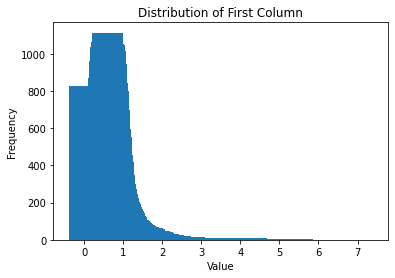

In [8]:
import numpy as np
import matplotlib.pyplot as plt

feature_array = np.load('feature_array.npy')
print(feature_array)
print(feature_array.shape)

# 提取第一列
first_column = np.around(feature_array[:, 0], decimals=3)

# 统计数值分布
unique_values, counts = np.unique(first_column, return_counts=True)

# 找到数量最多的值
most_frequent_value = unique_values[np.argmax(counts)]
print("Most frequent value:", most_frequent_value)

n = 1000  # 第 n 多的值
sorted_indices = np.argsort(counts)
nth_most_frequent_value = unique_values[sorted_indices[-n]]
print(f"The {n}th most frequent value:", nth_most_frequent_value)

# 绘制直方图
plt.bar(unique_values, counts)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of First Column')
plt.show()



In [ ]:
# 要写入的数组
my_array = [1, 2, 3, 4, 5]

# 打开文件以进行写入
with open("array.txt", "w") as file:
    # 将数组转换为字符串，每个元素之间用空格分隔
    array_string = ' '.join(str(element) for element in my_array)
    
    # 将字符串写入文件
    file.write(array_string)

In [8]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import time
import logging
import wandb

from dataset.Spk251_train import Spk251_train
from dataset.Spk251_test import Spk251_test 

from model.AudioNet import AudioNet

from defense.defense import *
import time

model = AudioNet('./label-encoder-audionet-Spk251_test.txt')
state_dict = torch.load('/home/ics/code_xwd/SEC4SR-deafbackdoor/model_file/好的预训练模型/natural-audionet_339', map_location='cuda')
model.load_state_dict(state_dict)
model.eval()

model.training

False False None None None


False